In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Sources & Cleaning
[Link to PISA](https://pisadataexplorer.oecd.org/ide/idepisa/report.aspx?p=1-RMS-1-20123,20033-MATHEFF12-TOTAL-IN3,AUS,AUT,BEL,CAN,CHL,COL,CZE,DNK,EST,FIN,FRA,DEU,GRC,HUN,ISL,IRL,ISR,ITA,JPN,KOR,LVA,LTU,LUX,MEX,NLD,NZL,NOR,POL,PRT,SVK,SVN,ESP,SWE,CHE,TUR,GBR,USA,ALB,QLB,DZA,ARG,QRG,BAK,BLR,BIH,BRA,BRN,QCH,QCI,BGR,TAP,CRI,HRV,QCY,DOM,GEO,HKG,IDN,JOR,KAZ,QAZ,KSV,LBN,MAC,MYS,QYS,MLT,MDA,MNE,MAR,MKD,PAN,PER,PHL,QAT,ROU,RUS,SAU,SRB,SGP,THA,TTO,TUN,UKR,ARE,URY,VNM-MN_MN-J-0_Y-2-37&Lang=1033)

In [6]:
new_data = pd.read_excel('IDEExcelExport-Jan122023-1011PM.xls', skiprows=13, usecols="B:F", nrows=88,
                         sheet_name=None, na_values=["†", "—"])

df_out = pd.DataFrame()

for sheet_name, df in new_data.items():
    sheet_name = sheet_name.replace("- Table", "")
    
    col_dict = {"Jurisdiction":     "Location",
                "Average":          sheet_name + "_avg_2012",
                "Standard Error":   sheet_name + "_se_2012",
                "Average.1":        sheet_name + "_avg_2003",
                "Standard Error.1": sheet_name + "_se_2003"}

    df.rename(columns=col_dict, inplace=True)
    df.set_index("Location", inplace=True)
    df_out = df_out.merge(df, how="right", right_on="Location", left_index = True)
    
df_out.head(100)


,overall_score_avg_2012,overall_score_se_2012,overall_score_avg_2003,overall_score_se_2003,self_eff_avg_2012,self_eff_se_2012,self_eff_avg_2003,self_eff_se_2003,anxiety_avg_2012,anxiety_se_2012,anxiety_avg_2003,anxiety_se_2003,self_conc_avg_2012,self_conc_se_2012,self_conc_avg_2003,self_conc_se_2003,student_fees_avg_2012,student_fees_se_2012,student_fees_avg_2003,student_fees_se_2003
Location,,,,,,,,,,,,,,,,,,,,
International Average (OECD),490.357783,0.470671,499.463525,0.552362,-0.012387,0.003848,-0.084927,0.003968,0.005177,0.003220,-0.039541,0.003136,0.003842,0.003209,-0.058966,0.003321,9.823672,0.155878,9.534804,0.237942
Australia,504.150766,1.643078,524.266004,2.148447,0.058438,0.016618,0.013307,0.018420,0.028055,0.013054,-0.093769,0.012220,0.061156,0.012336,0.071408,0.015302,24.113437,0.657665,24.236969,0.693333
Austria,505.540743,2.668064,505.610984,3.266191,0.063703,0.021652,0.067429,0.021951,-0.226136,0.029773,-0.290293,0.022468,0.023683,0.025728,0.007551,0.019322,NaN,NaN,NaN,NaN
Belgium,514.529245,2.144891,529.286415,2.286061,-0.118955,0.016678,-0.123853,0.015019,0.055727,0.017978,0.038050,0.015239,-0.055367,0.017524,-0.084375,0.014597,10.1¹,0.839092,8¹,0.769575
Canada,518.070400,1.841355,532.486736,1.817917,0.110509,0.018448,0.152476,0.015251,0.008651,0.015435,-0.083202,0.010884,0.192470,0.015430,0.119922,0.010618,10.089896,0.842710,9.6¹,0.721632
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Tunisia,387.824630,3.914504,358.733222,2.535955,-0.308208,0.025666,-0.359840,0.022249,0.647900,0.018345,0.538359,0.016617,0.063560,0.024168,0.083680,0.023344,14.9¹,1.544154,20.321304,1.225711
Ukraine,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
United Arab Emirates,434.007165,2.425599,NaN,NaN,0.008300,0.019355,NaN,NaN,0.193601,0.018763,NaN,NaN,0.438185,0.014434,NaN,NaN,66.5¹,1.766528,NaN,NaN


## Visualizations

1. Mathematic self-efficacy and anxiety

In [244]:
pix = {
    'x03': 'self_eff_avg_2003',
    'x12': 'self_eff_avg_2012',
    'y03': 'anxiety_avg_2003',
    'y12': 'anxiety_avg_2012',
    'idx': 'International Average (OECD)',
    'title': 'Self-efficacy and Anxiety'
}

def plotyplot(pix):
    sns.scatter
    




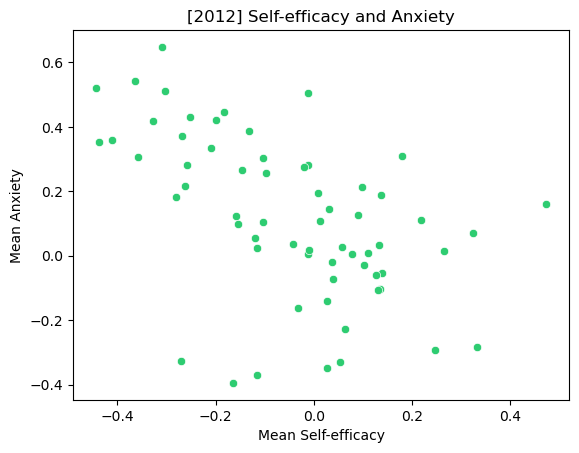

In [241]:
sns.scatterplot(data=df_out, x=x03, y=y03, color={'#9B59B6'}, alpha=1)   \
    .set(title="[2003] Self-efficacy and Anxiety",
        xlabel = "Mean Self-efficacy", 
        ylabel = "Mean Anxiety") 
plt.show()

sns.scatterplot(data=df_out, x=x12, y=y12, color={'#2ECC71'})   \
    .set(title="[2012] Self-efficacy and Anxiety",
         xlabel = "Mean Self-efficacy", 
         ylabel = "Mean Anxiety") 

plt.show()